In [ ]:
import os
import json
import pandas as pd


json_files = [
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_deepseek-chat_voted_five_models_new.json',
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_deepseek-chat_voted_five_models_2.json',  
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_deepseek-chat_voted_five_models_3.json',
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_yi-lightning_voted_five_models.json',
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_yi-lightning_voted_five_models_2.json',
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_yi-lightning_voted_five_models_3.json',
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_gpt-4o_voted_five_models_1.json',
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_gpt-4o_voted_five_models_2.json',
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_gpt-4o_voted_five_models_4.json',
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_o1-mini_voted_five_models.json',
    './small_sample_output_dir/split0_output_summary_voted_processed_five_models_qwen-max_voted_five_models_final.json'
]
json_files = {
    'deepseek-v3': {
        'round1': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_deepseek-chat_voted_five_models_new.json',
        'round2': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_deepseek-chat_voted_five_models_2.json',
        'round3': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_deepseek-chat_voted_five_models_3.json',
    },
    'yi-lightning': {
        'round1': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_yi-lightning_voted_five_models.json',
        'round2': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_yi-lightning_voted_five_models_2.json',
        'round3': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_yi-lightning_voted_five_models_3.json',
    },
    'gpt-4o': {
        'round1': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_gpt-4o_voted_five_models_1.json',
        'round2': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_gpt-4o_voted_five_models_2.json',
        'round3': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_gpt-4o_voted_five_models_4.json',
    },
    'o1-mini': {
        'round1': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_o1-mini_voted_five_models.json',
    },
    'qwen-max': {
        'round1': './small_sample_output_dir/split0_output_summary_voted_processed_five_models_qwen-max_voted_five_models_final.json',
    }
}

In [ ]:
with open('./small_sample_output_dir/split0_output_summary_five_models.json','r') as f:
    data = json.load(f)

data[0]

{'question': 'import sys, os, io\r\ninput = io.BytesIO(os.read(0, os.fstat(0).st_size)).readline\r\n\r\ndef binary_search(c1, c2):\r\n    m = (c1 + c2 + 1) // 2\r\n    while abs(c1 - c2) > 1:\r\n        m = (c1 + c2 + 1) // 2\r\n        if ok(m):\r\n            c1 = m\r\n        else:\r\n            c2 = m\r\n    m = max(m - 1, 1)\r\n    while ok(m):\r\n        m += 1\r\n    return m - 1\r\n\r\ndef ok(m):\r\n    c = [0] * k\r\n    s0 = 0\r\n    for i in range(n - 1, n - m, -1):\r\n        si = s[i] - 97\r\n        if si >= 0:\r\n            c[si] += 1\r\n            s0 += 1\r\n    for i in range(n - m, -1, -1):\r\n        si = s[i] - 97\r\n        if si >= 0:\r\n            c[si] += 1\r\n            s0 += 1\r\n        u = i + m - 1\r\n        for j in range(k):\r\n            if not c[j] ^ s0:\r\n                x[j][i] = i\r\n            else:\r\n                x[j][i] = x[j][i + 1]\r\n        su = s[u] - 97\r\n        if su >= 0:\r\n            c[su] -= 1\r\n            s0 -= 1\r\n 

In [4]:
# 'gpt4o', 'deepseekv3', 'claude3.5-1022', 'gemini1.5-pro-latest', 'yi-lightning'
model_list = ['gpt4o', 'deepseekv3', 'claude3.5-1022', 'gemini1.5-pro-latest', 'yi-lightning']

In [5]:
def get_cwe_list(text):
    cwe_list = []
    import re
    if text is None:
        return []
    cwe_pattern = re.compile(r'CWE-(?:\d+|other)')
    cwe_list = cwe_pattern.findall(text)
    return cwe_list


statistics_data = []

for item in data:
    js = {
        'question': item['question'],
        'cwe_list': {
            'gpt4o': [],
            'deepseekv3': [],
            'claude3.5-1022': [],
            'gemini1.5-pro-latest': [],
            'yi-lightning': []
        },
        'cwe_count': {
            'gpt4o': 0,
            'deepseekv3': 0,
            'claude3.5-1022': 0,
            'gemini1.5-pro-latest': 0,
            'yi-lightning': 0
        }
    }
    for model in model_list:
        cwe_list = get_cwe_list(item[model]['vulnerability_analysis'])
        js['cwe_list'][model] = cwe_list
        js['cwe_count'][model] = len(cwe_list)
    statistics_data.append(js)



In [6]:
statistics_data[0],data[3]

({'question': 'import sys, os, io\r\ninput = io.BytesIO(os.read(0, os.fstat(0).st_size)).readline\r\n\r\ndef binary_search(c1, c2):\r\n    m = (c1 + c2 + 1) // 2\r\n    while abs(c1 - c2) > 1:\r\n        m = (c1 + c2 + 1) // 2\r\n        if ok(m):\r\n            c1 = m\r\n        else:\r\n            c2 = m\r\n    m = max(m - 1, 1)\r\n    while ok(m):\r\n        m += 1\r\n    return m - 1\r\n\r\ndef ok(m):\r\n    c = [0] * k\r\n    s0 = 0\r\n    for i in range(n - 1, n - m, -1):\r\n        si = s[i] - 97\r\n        if si >= 0:\r\n            c[si] += 1\r\n            s0 += 1\r\n    for i in range(n - m, -1, -1):\r\n        si = s[i] - 97\r\n        if si >= 0:\r\n            c[si] += 1\r\n            s0 += 1\r\n        u = i + m - 1\r\n        for j in range(k):\r\n            if not c[j] ^ s0:\r\n                x[j][i] = i\r\n            else:\r\n                x[j][i] = x[j][i + 1]\r\n        su = s[u] - 97\r\n        if su >= 0:\r\n            c[su] -= 1\r\n            s0 -= 1\r\n

In [6]:
no_duplicate_data = []
for item in statistics_data:
    js = {
        'question': item['question'],
        'cwe_list': {
            'gpt4o': list(set(item['cwe_list']['gpt4o'])),
            'deepseekv3': list(set(item['cwe_list']['deepseekv3'])),
            'claude3.5-1022': list(set(item['cwe_list']['claude3.5-1022'])),
            'gemini1.5-pro-latest': list(set(item['cwe_list']['gemini1.5-pro-latest'])),
            'yi-lightning': list(set(item['cwe_list']['yi-lightning']))
        },
        'cwe_count': {
            'gpt4o': 0,
            'deepseekv3': 0,
            'claude3.5-1022': 0,
            'gemini1.5-pro-latest': 0,
            'yi-lightning': 0
        }
    }
    for model in model_list:
        js['cwe_count'][model] = len(js['cwe_list'][model])
    no_duplicate_data.append(js)

no_duplicate_data[0]


{'question': 'import sys, os, io\r\ninput = io.BytesIO(os.read(0, os.fstat(0).st_size)).readline\r\n\r\ndef binary_search(c1, c2):\r\n    m = (c1 + c2 + 1) // 2\r\n    while abs(c1 - c2) > 1:\r\n        m = (c1 + c2 + 1) // 2\r\n        if ok(m):\r\n            c1 = m\r\n        else:\r\n            c2 = m\r\n    m = max(m - 1, 1)\r\n    while ok(m):\r\n        m += 1\r\n    return m - 1\r\n\r\ndef ok(m):\r\n    c = [0] * k\r\n    s0 = 0\r\n    for i in range(n - 1, n - m, -1):\r\n        si = s[i] - 97\r\n        if si >= 0:\r\n            c[si] += 1\r\n            s0 += 1\r\n    for i in range(n - m, -1, -1):\r\n        si = s[i] - 97\r\n        if si >= 0:\r\n            c[si] += 1\r\n            s0 += 1\r\n        u = i + m - 1\r\n        for j in range(k):\r\n            if not c[j] ^ s0:\r\n                x[j][i] = i\r\n            else:\r\n                x[j][i] = x[j][i + 1]\r\n        su = s[u] - 97\r\n        if su >= 0:\r\n            c[su] -= 1\r\n            s0 -= 1\r\n 

In [7]:
# 统计每个 CWE 在所有模型中的出现次数
cwe_count = {}
for item in no_duplicate_data:
    for model in model_list:
        for cwe in item['cwe_list'][model]:
            cwe_count[cwe] = cwe_count.get(cwe, 0) + 1

cwe_count

{'CWE-20': 1714,
 'CWE-125': 1496,
 'CWE-787': 985,
 'CWE-129': 24,
 'CWE-416': 194,
 'CWE-476': 31,
 'CWE-755': 1,
 'CWE-561': 12,
 'CWE-788': 3,
 'CWE-other': 65,
 'CWE-789': 5,
 'CWE-22': 100,
 'CWE-457': 37,
 'CWE-400': 25,
 'CWE-252': 5,
 'CWE-522': 3,
 'CWE-459': 8,
 'CWE-362': 4,
 'CWE-390': 1,
 'CWE-352': 33,
 'CWE-209': 17,
 'CWE-404': 13,
 'CWE-601': 3,
 'CWE-79': 27,
 'CWE-434': 26,
 'CWE-674': 5,
 'CWE-197': 4,
 'CWE-190': 41,
 'CWE-682': 2,
 'CWE-369': 5,
 'CWE-691': 1,
 'CWE-248': 9,
 'CWE-396': 4,
 'CWE-665': 4,
 'CWE-401': 9,
 'CWE-284': 1,
 'CWE-502': 4,
 'CWE-681': 1,
 'CWE-121': 1,
 'CWE-834': 1,
 'CWE-664': 1,
 'CWE-89': 17,
 'CWE-412': 1,
 'CWE-703': 2,
 'CWE-120': 12,
 'CWE-398': 3,
 'CWE-470': 1,
 'CWE-732': 4,
 'CWE-835': 2,
 'CWE-676': 3,
 'CWE-563': 1,
 'CWE-642': 1,
 'CWE-366': 2,
 'CWE-119': 9,
 'CWE-134': 2,
 'CWE-200': 2,
 'CWE-758': 3,
 'CWE-226': 1,
 'CWE-273': 1,
 'CWE-918': 1,
 'CWE-391': 3,
 'CWE-484': 2,
 'CWE-778': 1,
 'CWE-785': 1,
 'CWE-394': 1,
 

In [34]:
model_counts

{'gpt4o': [3,
  1,
  0,
  3,
  2,
  3,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  2,
  5,
  2,
  2,
  2,
  2,
  3,
  0,
  3,
  2,
  0,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  2,
  3,
  1,
  2,
  3,
  0,
  0,
  1,
  1,
  0,
  1,
  2,
  2,
  2,
  3,
  2,
  3,
  3,
  2,
  2,
  1,
  2,
  4,
  3,
  3,
  0,
  2,
  3,
  2,
  2,
  0,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  3,
  0,
  0,
  0,
  2,
  2,
  2,
  2,
  1,
  3,
  2,
  2,
  3,
  3,
  3,
  2,
  2,
  3,
  3,
  3,
  3,
  0,
  2,
  0,
  2,
  2,
  2,
  3,
  1,
  2,
  3,
  4,
  4,
  3,
  2,
  1,
  2,
  2,
  3,
  3,
  3,
  1,
  2,
  2,
  3,
  3,
  2,
  1,
  1,
  2,
  3,
  3,
  2,
  2,
  2,
  2,
  3,
  3,
  4,
  3,
  4,
  0,
  0,
  2,
  0,
  0,
  0,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  3,
  2,
  3,
  3,
  3,
  2,
  3,
  0,
  0,
  3,
  2,
  3,
  1,
  3,
  2,
  2,
  4,
  2,
  2,
  3,
  2,
  2,
  2,
  2,
  3,
  4,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  3,
  2,
  2,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
 

In [8]:
for item in statistics_data:
    with open('./cwe_detection_count_duplicate.csv','a+') as f:
        f.write(str(item['cwe_count']['gpt4o'])+','+str(item['cwe_count']['deepseekv3'])+','+str(item['cwe_count']['claude3.5-1022'])+','+str(item['cwe_count']['gemini1.5-pro-latest'])+','+str(item['cwe_count']['yi-lightning']))
        f.write('\n')


In [9]:
# 计算比例
# 重复数据
gpt4o_count = []
deepseekv3_count = []
claude3_5_1022_count = []
gemini1_5_pro_latest_count = []
yi_lightning_count = []
for item in no_duplicate_data:
    gpt4o_count.append(item['cwe_count']['gpt4o'])
    deepseekv3_count.append(item['cwe_count']['deepseekv3'])
    claude3_5_1022_count.append(item['cwe_count']['claude3.5-1022'])
    gemini1_5_pro_latest_count.append(item['cwe_count']['gemini1.5-pro-latest'])
    yi_lightning_count.append(item['cwe_count']['yi-lightning'])

# 计算比例
import collections
gpt4o_percentage = collections.Counter(gpt4o_count)
deepseekv3_percentage = collections.Counter(deepseekv3_count)
claude3_5_1022_percentage = collections.Counter(claude3_5_1022_count)
gemini1_5_pro_latest_percentage = collections.Counter(gemini1_5_pro_latest_count)
yi_lightning_percentage = collections.Counter(yi_lightning_count)

# 计算比例，处理成json形式，count
total_gpt4o = sum(gpt4o_percentage.values())
total_deepseekv3 = sum(deepseekv3_percentage.values())
total_claude3_5_1022 = sum(claude3_5_1022_percentage.values())
total_gemini1_5_pro_latest = sum(gemini1_5_pro_latest_percentage.values())
total_yi_lightning = sum(yi_lightning_percentage.values())

gpt4o_percentage = {k: v / total_gpt4o for k, v in gpt4o_percentage.items()}
deepseekv3_percentage = {k: v / total_deepseekv3 for k, v in deepseekv3_percentage.items()}
claude3_5_1022_percentage = {k: v / total_claude3_5_1022 for k, v in claude3_5_1022_percentage.items()}
gemini1_5_pro_latest_percentage = {k: v / total_gemini1_5_pro_latest for k, v in gemini1_5_pro_latest_percentage.items()}
yi_lightning_percentage = {k: v / total_yi_lightning for k, v in yi_lightning_percentage.items()}
print(sum(gpt4o_percentage.values()))

# 按键进行排序
gpt4o_percentage = sorted(gpt4o_percentage.items(), key=lambda x: x[0])
deepseekv3_percentage = sorted(deepseekv3_percentage.items(), key=lambda x: x[0])
claude3_5_1022_percentage = sorted(claude3_5_1022_percentage.items(), key=lambda x: x[0])
gemini1_5_pro_latest_percentage = sorted(gemini1_5_pro_latest_percentage.items(), key=lambda x: x[0])
yi_lightning_percentage = sorted(yi_lightning_percentage.items(), key=lambda x: x[0])

gpt4o_percentage

1.0


[(0, 0.108), (1, 0.088), (2, 0.442), (3, 0.316), (4, 0.042), (5, 0.004)]

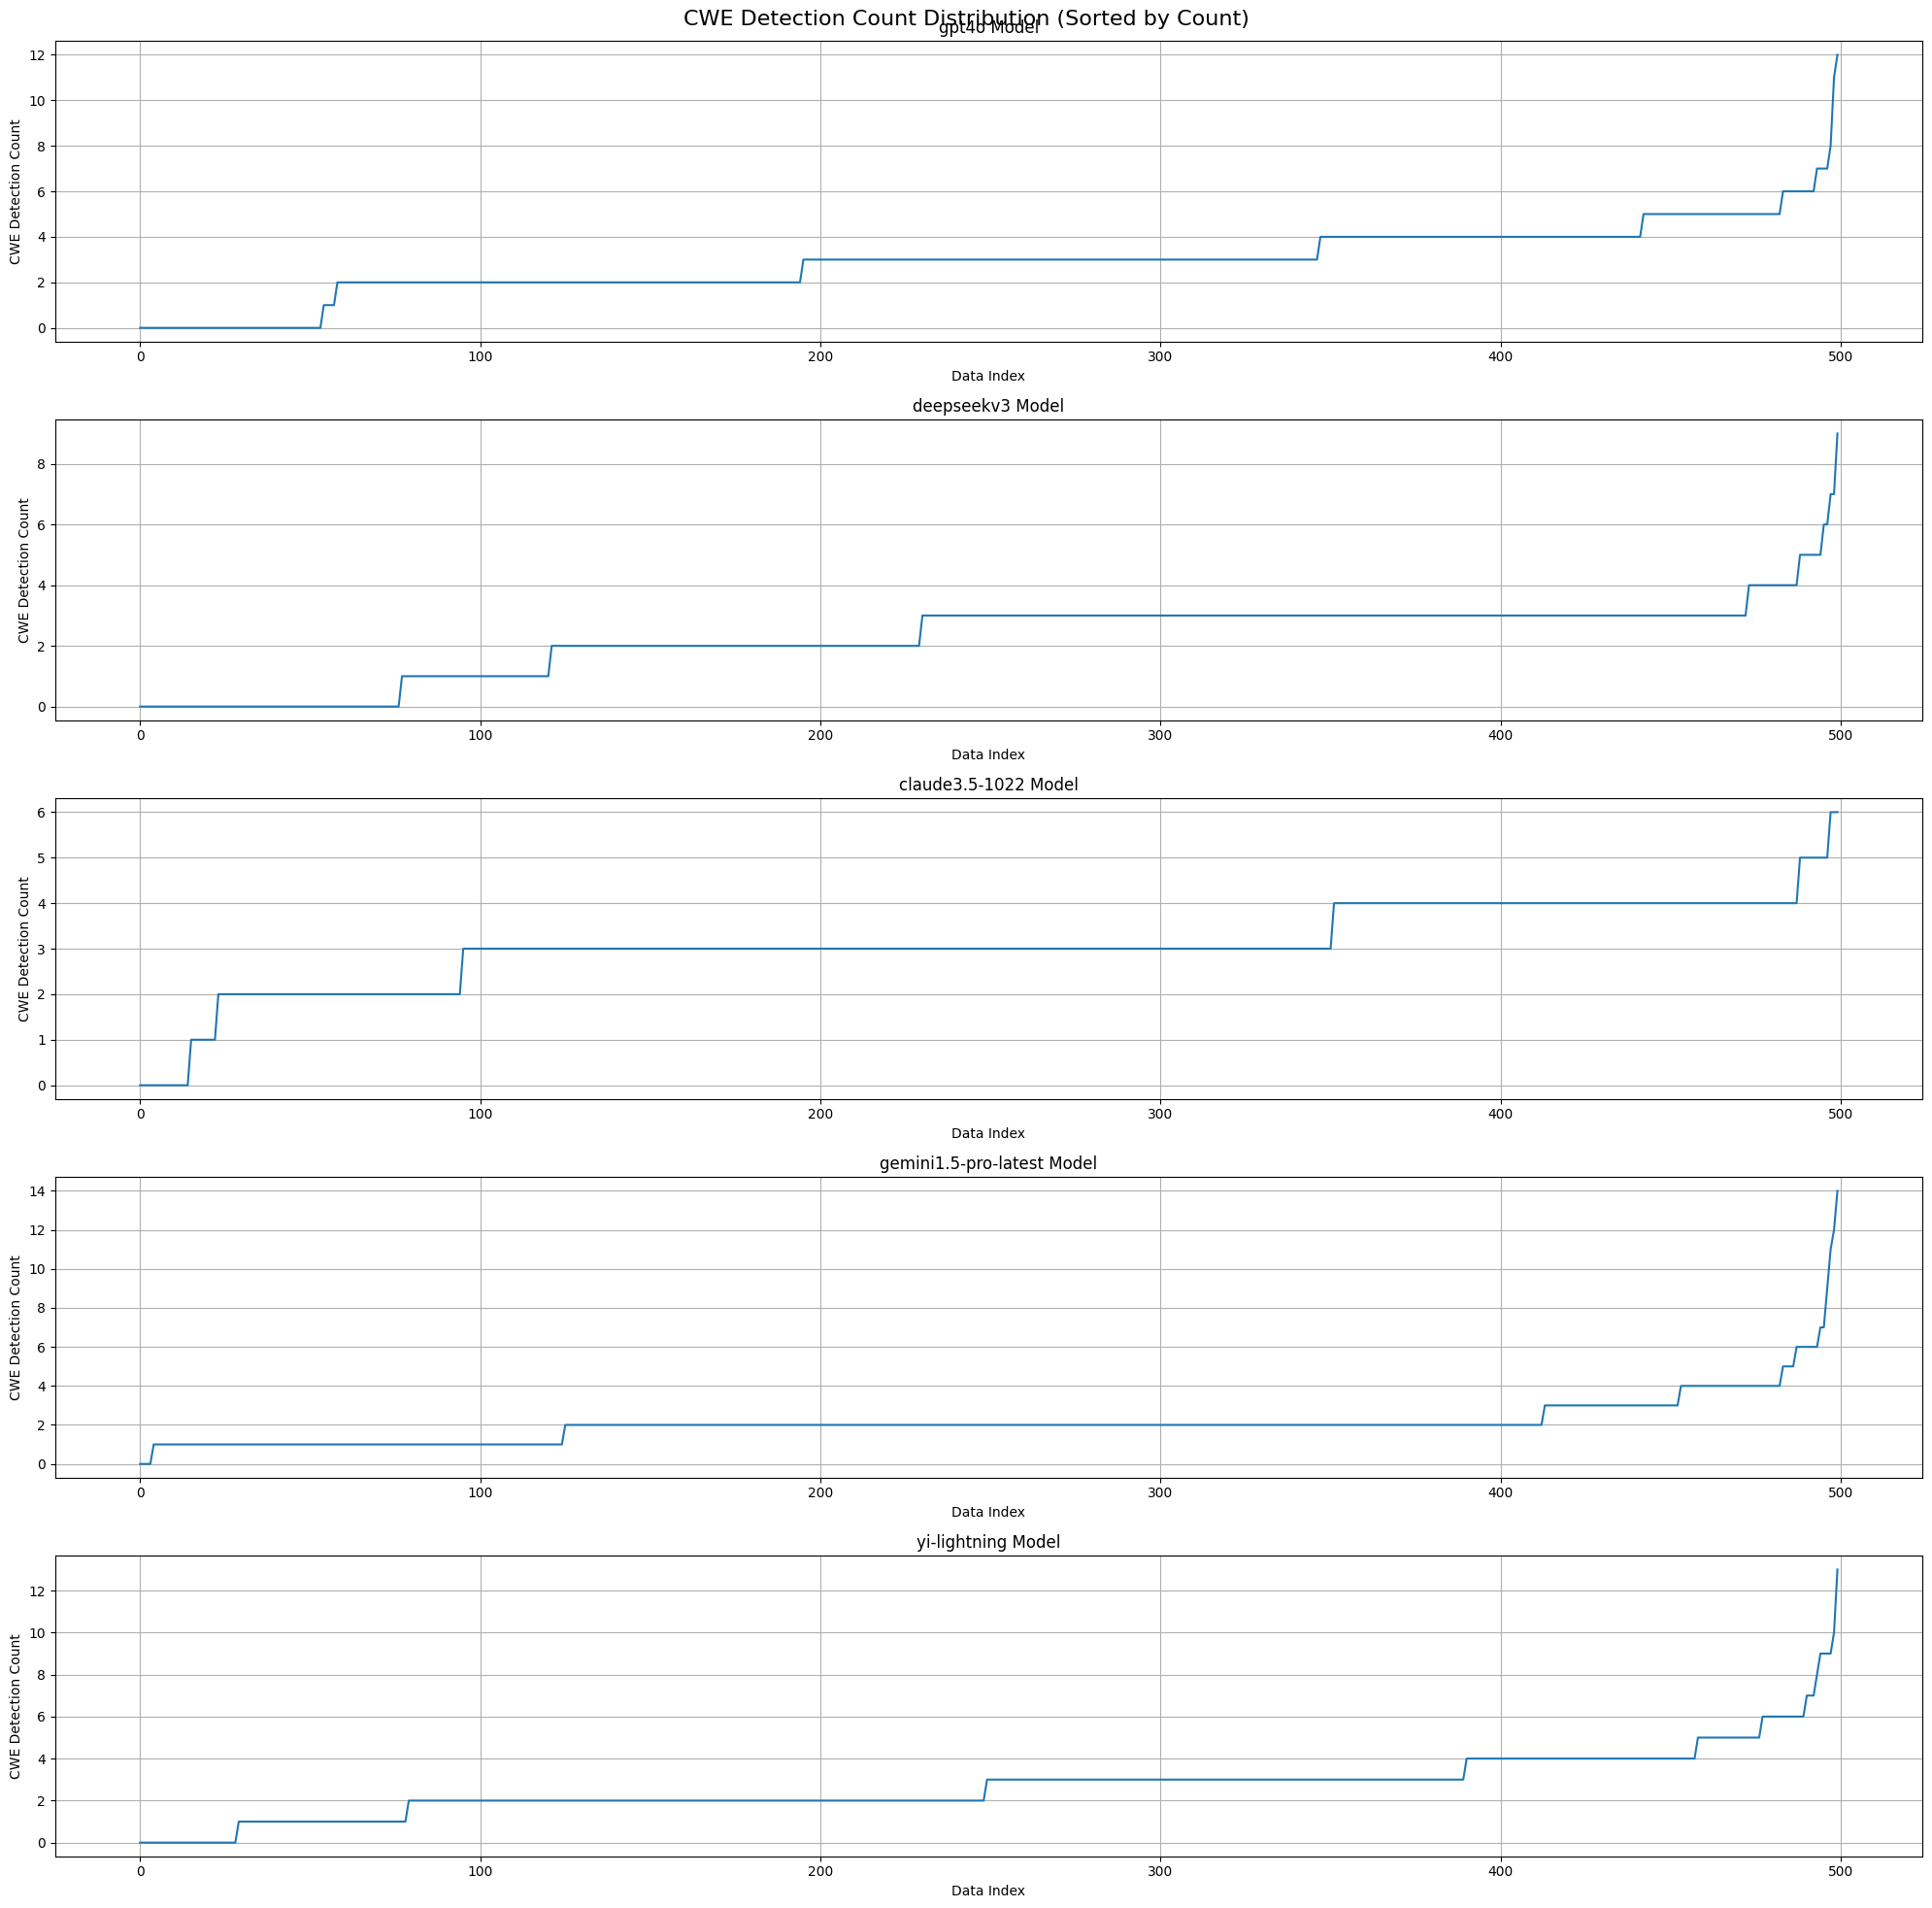

In [10]:
import matplotlib.pyplot as plt
# 创建一个大图
# 创建子图布局
fig, axes = plt.subplots(len(model_list), 1, figsize=(20, 4*len(model_list)))
fig.suptitle('CWE Detection Count Distribution (Sorted by Count)', fontsize=16)

# 为每个模型创建一个计数列表
model_counts = {model: [] for model in model_list}

# 收集每个数据点的CWE计数
for item in statistics_data:
    for model in model_list:
        model_counts[model].append(item['cwe_count'][model])

# 对每个模型的数据进行排序并绘制
for idx, model in enumerate(model_list):
    counts = model_counts[model]
    sorted_counts = sorted(counts)
    
    # 绘制当前模型的数据
    axes[idx].plot(range(len(sorted_counts)), sorted_counts)
    axes[idx].set_title(f'{model} Model')
    axes[idx].set_xlabel('Data Index')
    axes[idx].set_ylabel('CWE Detection Count')
    axes[idx].grid(True)

# 调整子图之间的间距
plt.tight_layout()
plt.show()

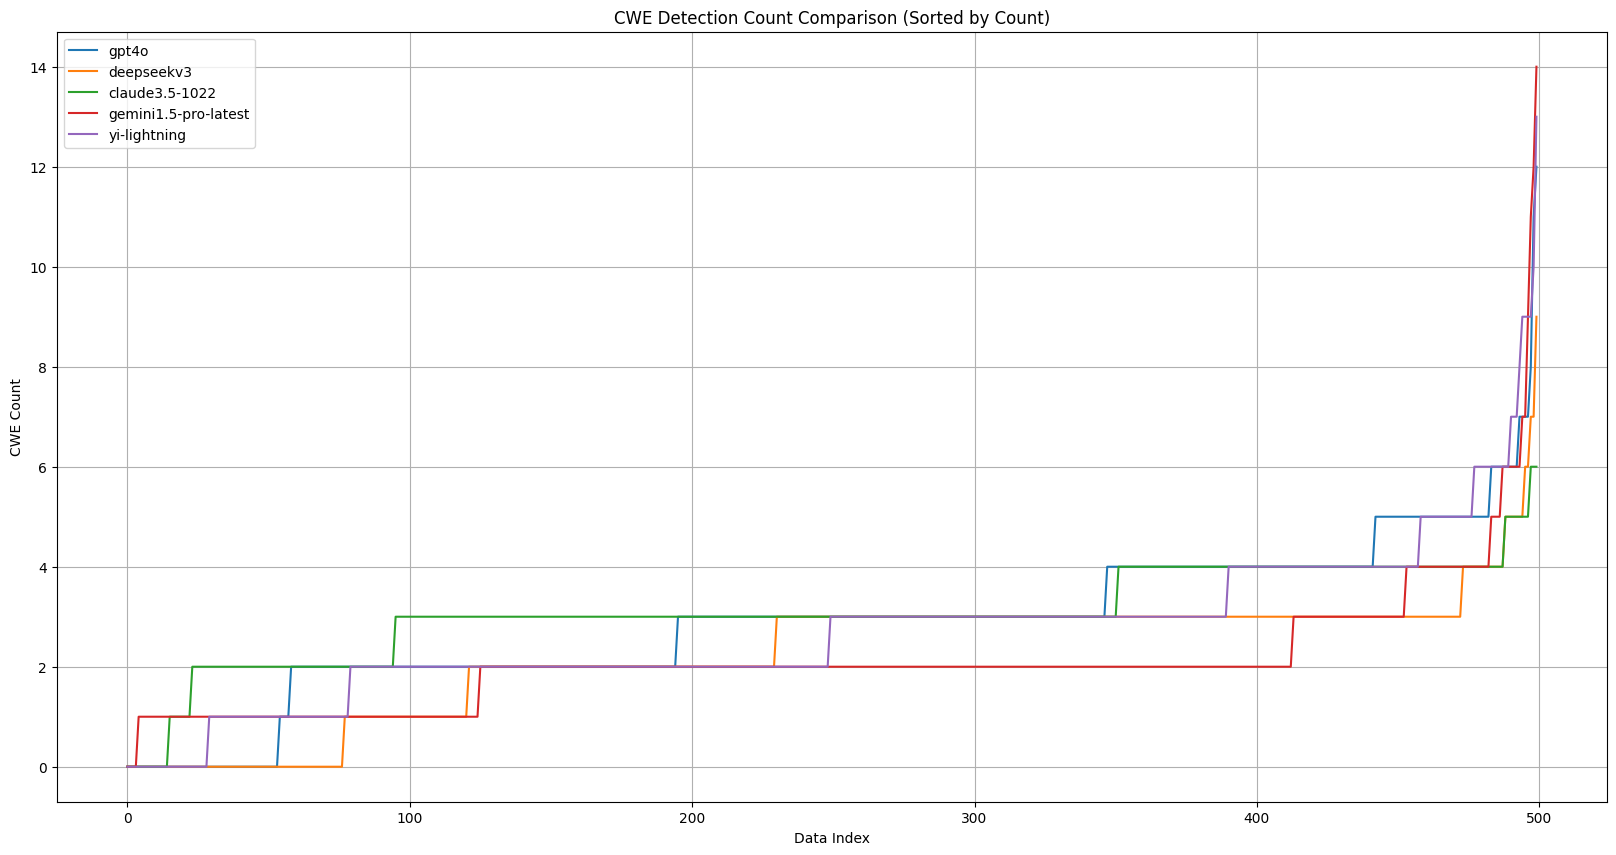

In [11]:
# 创建一个大图
plt.figure(figsize=(20, 10))

# 为每个模型创建一个计数列表
model_counts = {model: [] for model in model_list}

# 收集每个数据点的CWE计数
for item in statistics_data:
    for model in model_list:
        model_counts[model].append(item['cwe_count'][model])

# 对每个模型的数据进行排序
sorted_counts = {model: sorted(counts) for model, counts in model_counts.items()}

# 绘制每个模型的折线
for model in model_list:
    plt.plot(range(len(sorted_counts[model])), sorted_counts[model], label=model)

# 设置图表属性
plt.xlabel('Data Index')
plt.ylabel('CWE Count')
plt.title('CWE Detection Count Comparison (Sorted by Count)')
plt.legend()
plt.grid(True)
plt.show()

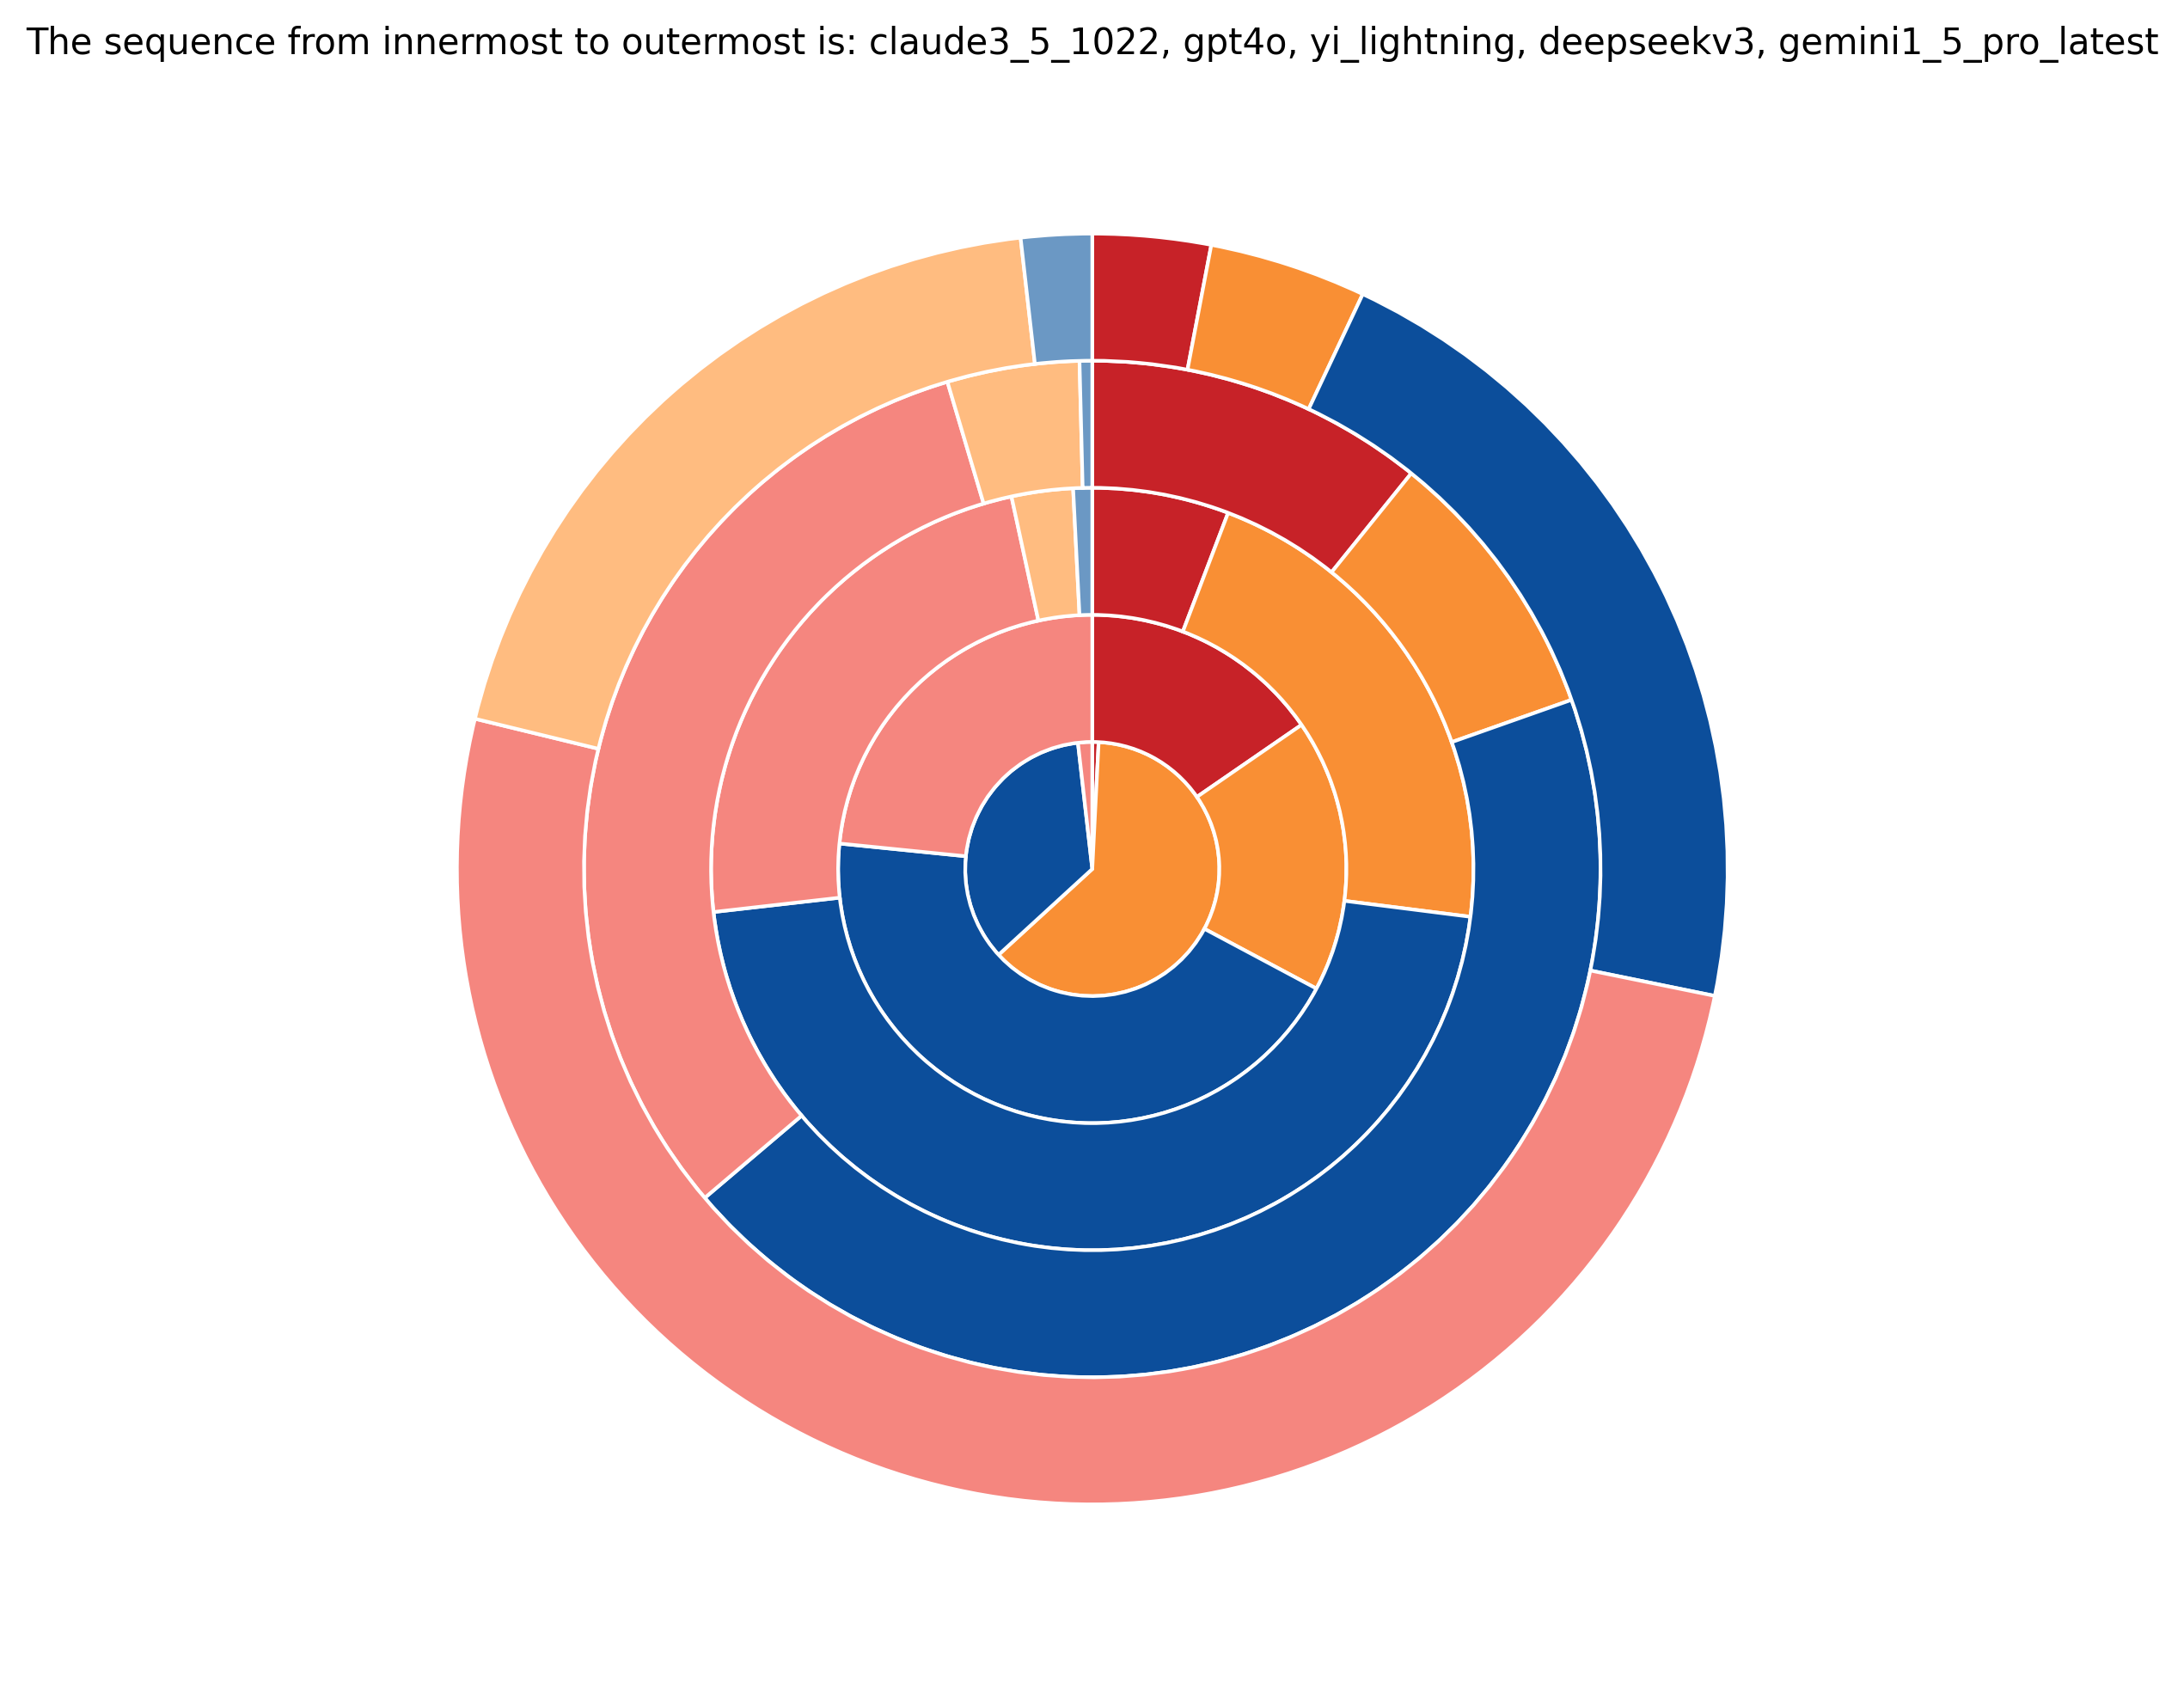

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# ring_data = [
#     claude3_5_1022_percentage,
#     gpt4o_percentage,
#     yi_lightning_percentage,
#     deepseekv3_percentage,
#     gemini1_5_pro_latest_percentage,
    
# ]
ring_data = [
    gemini1_5_pro_latest_percentage,
    deepseekv3_percentage,
    yi_lightning_percentage,
    gpt4o_percentage,
    claude3_5_1022_percentage,
]

# option_colors = [
#     '#33539E', '#9d59a7', '#e56696', '#ff8978', '#ffbf62', '#f9f871'
# ]

# option_colors = [
#     '#b3c9fb','#7ddcff','#3feefe','#5afad5','#a8fe9e','#f9f871'
# ]

option_colors = [
    '#C72228','#F98F34','#0C4E9B','#F5867F','#FFBC80','#6B98C4'
]

# 绘制环形图
fig, ax = plt.subplots(figsize=(10, 8),dpi=300)

# 设置每个环的半径（从内到外依次增加）
radii = [0.2, 0.4, 0.6, 0.8, 1.0]   # 从中心到外层的半径
ring_width = 0.2  # 每个环的宽度

# 绘制每个环
for i, (data, color) in enumerate(zip(ring_data, option_colors)):
    labels = [str(item[0]) for item in data]
    sizes = [item[1] * 100 for item in data]  # 转换为百分比
    colors = [option_colors[item[0]] for item in data]

    wedges, _ = ax.pie(
        sizes,
        radius=radii[i],
        colors=colors,
        wedgeprops=dict(width=ring_width, edgecolor='w'),
        startangle=90,
        counterclock=False
    )

    # for j, wedge in enumerate(wedges):
    #     angle = (wedge.theta2 + wedge.theta1) / 2  # 扇形的中间角度
    #     x = radii[i] * 0.9 * np.cos(np.deg2rad(angle))  # 标签的x坐标
    #     y = radii[i] * 0.9 * np.sin(np.deg2rad(angle))  # 标签的y坐标
    #     ax.text(x, y, labels[j], ha='center', va='center', fontsize=8, color='black')

ax.set_title('The sequence from innermost to outermost is: claude3_5_1022, gpt4o, yi_lightning, deepseekv3, gemini1_5_pro_latest', fontsize=10)
# ax.set_title('The sequence from innermost to outermost is: gemini1_5_pro_latest, deepseekv3, yi_lightning, gpt4o, claude3_5_1022', fontsize=10)

plt.show()
